In [1]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")   #Ignore warnings


In [2]:
# Read files
fuel_df = pd.read_csv("Resources/Fuel_Consumption_2000-2022.csv")
fuel_df.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [3]:
# Get information of dataframe
fuel_df.describe()

,YEAR,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
count,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000
mean,2011.554442,3.356646,5.854141,12.763513,8.919126,11.034341,27.374534,250.068452
std,6.298269,1.335425,1.819597,3.500999,2.274764,2.910920,7.376982,59.355276
min,2000.000000,0.800000,2.000000,3.500000,3.200000,3.600000,11.000000,83.000000
25%,2006.000000,2.300000,4.000000,10.400000,7.300000,9.100000,22.000000,209.000000
50%,2012.000000,3.000000,6.000000,12.300000,8.400000,10.600000,27.000000,243.000000
75%,2017.000000,4.200000,8.000000,14.725000,10.200000,12.700000,31.000000,288.000000
max,2022.000000,8.400000,16.000000,30.600000,20.900000,26.100000,78.000000,608.000000


In [6]:
fuel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22556 non-null  int64  
 1   MAKE              22556 non-null  object 
 2   MODEL             22556 non-null  object 
 3   VEHICLE CLASS     22556 non-null  object 
 4   ENGINE SIZE       22556 non-null  float64
 5   CYLINDERS         22556 non-null  int64  
 6   TRANSMISSION      22556 non-null  object 
 7   FUEL              22556 non-null  object 
 8   FUEL CONSUMPTION  22556 non-null  float64
 9   HWY (L/100 km)    22556 non-null  float64
 10  COMB (L/100 km)   22556 non-null  float64
 11  COMB (mpg)        22556 non-null  int64  
 12  EMISSIONS         22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


There are no null values in the dataframe


In [7]:
# drop duplicates
fuel_df.duplicated(keep="first")

0        False
1        False
2        False
3        False
4        False
         ...  
22551    False
22552    False
22553    False
22554    False
22555    False
Length: 22556, dtype: bool

In [16]:
fuel_df["MAKE"].value_counts()


CHEVROLET        1725
BMW              1490
GMC              1357
FORD             1276
MERCEDES-BENZ     935
                 ... 
ALFA ROMEO          8
SRT                 4
GENESIS             4
BUGATTI             3
PLYMOUTH            2
Name: MAKE, Length: 87, dtype: int64

In [21]:
fuel_df["ENGINE SIZE"].value_counts()

2.0    3020
3.0    2070
2.5    1506
3.5    1467
5.3    1230
       ... 
2.1       5
0.9       3
6.3       3
0.8       3
4.1       1
Name: ENGINE SIZE, Length: 63, dtype: int64

In [89]:
fuel_df["VEHICLE CLASS"].unique()

array(['COMPACT', 'MID-SIZE', 'SUBCOMPACT', 'STATIONWAGON-MID-SIZE',
       'MINICOMPACT', 'TWO-SEATER', 'STATIONWAGON-SMALL', 'FULL-SIZE',
       'SUV-STANDARD', 'VAN-CARGO', 'VAN-PASSENGER',
       'PICKUPTRUCK-STANDARD', 'PICKUPTRUCK-SMALL', 'MINIVAN',
       'SPECIALPURPOSEVEHICLE', 'SUV-SMALL'], dtype=object)

In [90]:
#It has been identified the vehicle class has some type connect with "-" and some connected with ":", replace one of them
fuel_df["VEHICLE CLASS"] = fuel_df["VEHICLE CLASS"].apply(str.upper)



# "SUV - Small" is a new type of vehicle appears after 2017, add "standard" after SUV
fuel_df = fuel_df.replace({"VEHICLE CLASS": {":": "-", "SUV":"SUV-STANDARD"}})
fuel_df["VEHICLE CLASS"] = fuel_df["VEHICLE CLASS"].str.replace(" ", "")

In [91]:
year_df = fuel_df[fuel_df["YEAR"]>2017]
year_df.head(15)

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS,car_model
17553,2018,Acura,ILX,COMPACT,2.4,4,AM8,Z,9.4,6.8,8.2,34,192,Acura_ILX
17554,2018,Acura,MDX SH-AWD,SUV-SMALL,3.5,6,AS9,Z,12.6,9.0,11.0,26,259,Acura_MDX SH-AWD
17555,2018,Acura,MDX SH-AWD Elite,SUV-SMALL,3.5,6,AS9,Z,12.2,9.0,10.7,26,251,Acura_MDX SH-AWD Elite
17556,2018,Acura,MDX Hybrid AWD,SUV-SMALL,3.0,6,AM7,Z,9.1,9.0,9.0,31,210,Acura_MDX Hybrid AWD
17557,2018,Acura,NSX,TWO-SEATER,3.5,6,AM9,Z,11.1,10.8,11.0,26,261,Acura_NSX
17558,2018,Acura,RDX AWD,SUV-SMALL,3.5,6,AS6,Z,12.4,8.7,10.7,26,250,Acura_RDX AWD
17559,2018,Acura,RLX Hybrid,MID-SIZE,3.5,6,AM7,Z,8.4,8.2,8.4,34,196,Acura_RLX Hybrid
17560,2018,Acura,TLX,COMPACT,2.4,4,AM8,Z,10.0,7.1,8.7,32,205,Acura_TLX
17561,2018,Acura,TLX A-SPEC,COMPACT,2.4,4,AM8,Z,10.2,7.4,8.9,32,209,Acura_TLX A-SPEC
17562,2018,Acura,TLX SH-AWD,COMPACT,3.5,6,AS9,Z,11.4,7.7,9.8,29,228,Acura_TLX SH-AWD


In [92]:
# Pick the most popular 5 vehcle tyes
vehiclecl_df = fuel_df["VEHICLE CLASS"].value_counts().to_frame()
top_cl = list(vehiclecl_df[0:5].index)
top_cl

['SUV-STANDARD', 'COMPACT', 'MID-SIZE', 'PICKUPTRUCK-STANDARD', 'SUBCOMPACT']

In [105]:
vehiclecl_df.head(10)

,VEHICLE CLASS
SUV-STANDARD,3762
COMPACT,3127
MID-SIZE,2960
PICKUPTRUCK-STANDARD,2204
SUBCOMPACT,2010
SUV-SMALL,1756
FULL-SIZE,1503
TWO-SEATER,1312
MINICOMPACT,994
STATIONWAGON-SMALL,877


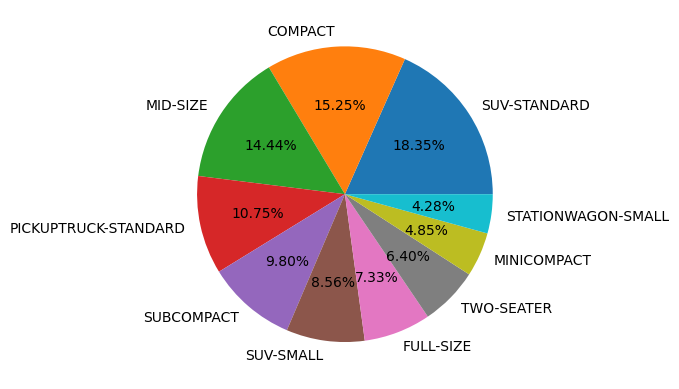

In [108]:
# Show the composition of vehicle classes
plt.pie(vehiclecl_df[:10]["VEHICLE CLASS"], labels=vehiclecl_df[0:10].index, autopct="%1.2f%%")
plt.show()

<Axes: ylabel='VEHICLE CLASS'>

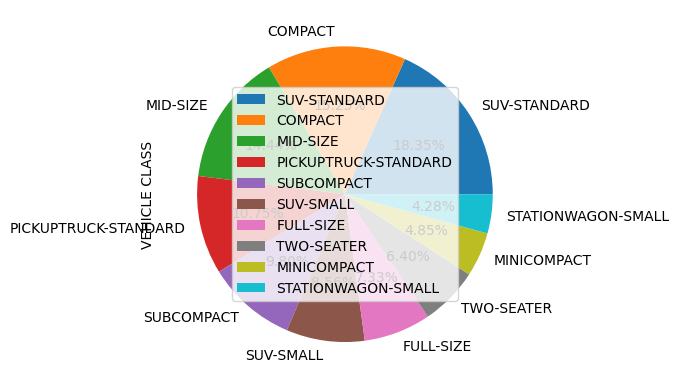

In [113]:
vehiclecl_df[0:10].plot(kind = "pie", y="VEHICLE CLASS", autopct="%1.2f%%")

In [100]:
# Has the emissions being reduced over the years with technology advancement?
fuel_reset = fuel_df.set_index("VEHICLE CLASS")
vehity_df = fuel_reset.loc[top_cl].reset_index()
emsconspt_year = vehity_df.groupby(by=["VEHICLE CLASS", "YEAR"], as_index=False).agg({"EMISSIONS": "mean", "FUEL CONSUMPTION": "mean"})
emsconspt_year

,VEHICLE CLASS,YEAR,EMISSIONS,FUEL CONSUMPTION
0,COMPACT,2000,213.371429,10.804762
1,COMPACT,2001,210.551724,10.671034
2,COMPACT,2002,211.082707,10.672180
3,COMPACT,2003,208.965035,10.530769
4,COMPACT,2004,212.025974,10.724675
...,...,...,...,...
110,SUV-STANDARD,2018,304.757282,15.355340
111,SUV-STANDARD,2019,304.909910,15.306306
112,SUV-STANDARD,2020,303.423729,15.119492
113,SUV-STANDARD,2021,303.874016,14.465354


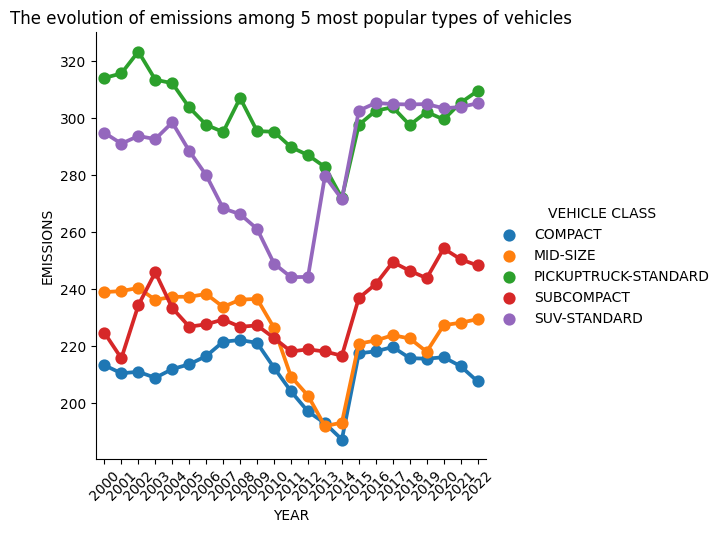

In [102]:
# Plot the relationship between emission and year for top 5 vehicle class
sns.catplot(emsconspt_year, x="YEAR", y="EMISSIONS", hue="VEHICLE CLASS", kind="point")
plt.title("The evolution of emissions among 5 most popular types of vehicles")
plt.xticks (rotation=45)
plt.show()

Text(0.5, 1.0, 'How the fuel consumption changed during 2000-2022 in 5 most popular vehicle types')

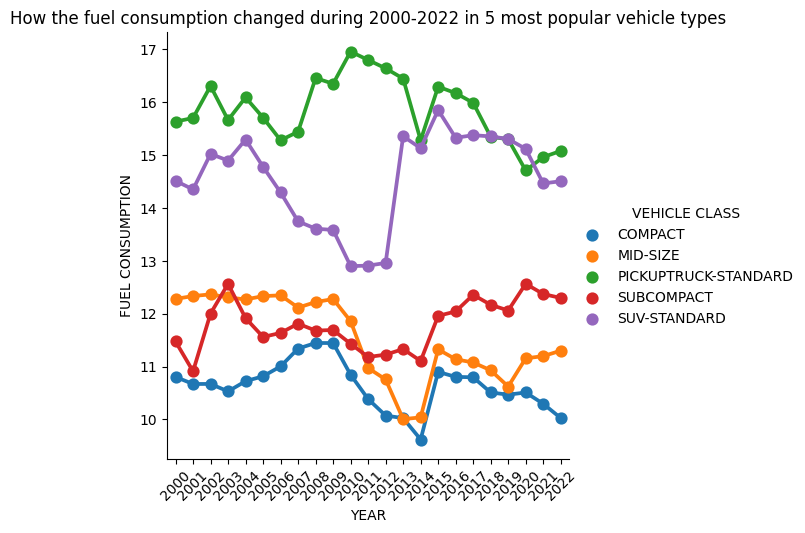

In [104]:
# Plot how the fuel consumption changed over the years among 5 most popular vehicle types
sns.catplot(data=emsconspt_year, x="YEAR", y="FUEL CONSUMPTION", hue="VEHICLE CLASS", kind="point")
plt.xticks(rotation=45)
plt.title("How the fuel consumption changed during 2000-2022 in 5 most popular vehicle types")

Overall, between 2003 to 2014, the emissions declined, and reached the lowest in 2014, then it climbed again. The fuel consumption reached their lowest in 2014 for most of the cars, but SUV hit it low during 2010-2012 for 3 years in a row.

In [95]:
# How about the engine size and cylinder changes over the years? Could these 2 be the contributing factors to the climbing emissions?

tech_df = vehity_df.groupby(["YEAR", "VEHICLE CLASS"], as_index=False).agg({"CYLINDERS": "mean", "ENGINE SIZE": "mean"})
tech_df.head()

,YEAR,VEHICLE CLASS,CYLINDERS,ENGINE SIZE
0,2000,COMPACT,4.904762,2.348571
1,2000,MID-SIZE,5.844156,3.029870
2,2000,PICKUPTRUCK-STANDARD,6.608696,4.208696
3,2000,SUBCOMPACT,5.365385,2.810577
4,2000,SUV-STANDARD,6.041237,3.624742


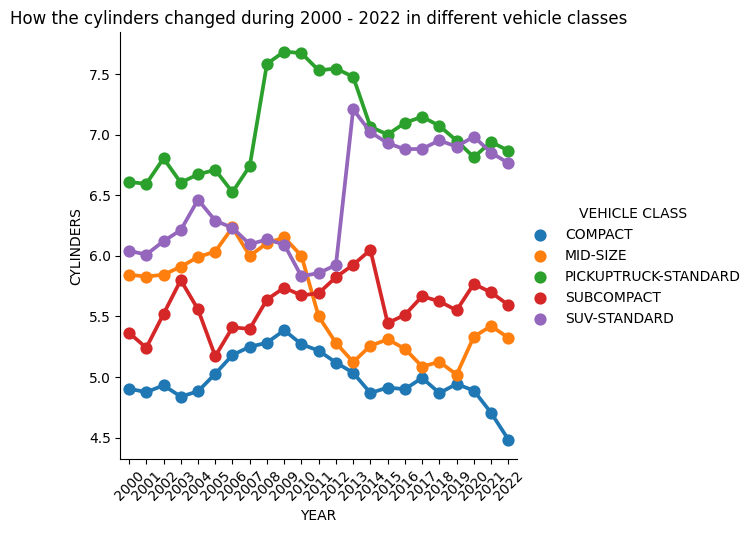

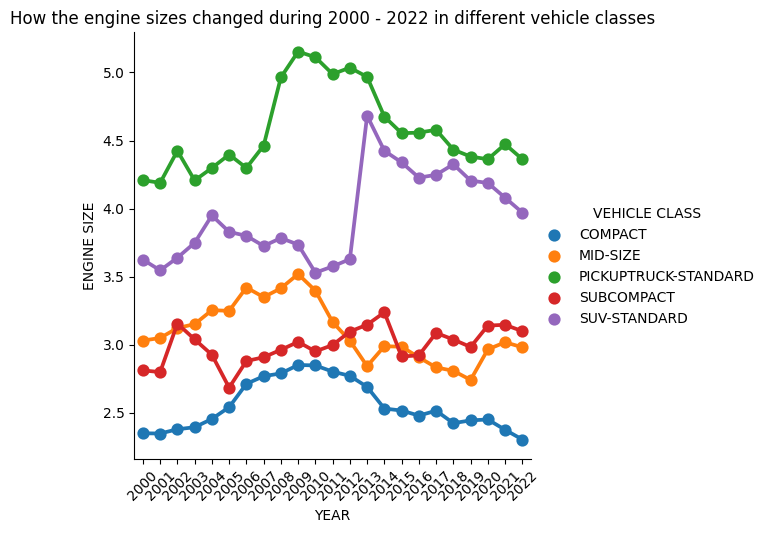

In [96]:
# Plot the changes of cylinders and engine sizes over the years among different vehicle classes

sns.catplot(data=tech_df, x="YEAR", y="CYLINDERS", hue="VEHICLE CLASS", kind="point")
plt.title("How the cylinders changed during 2000 - 2022 in different vehicle classes")
plt.xticks(rotation=45)
sns.catplot(data=tech_df, x="YEAR", y="ENGINE SIZE", hue="VEHICLE CLASS", kind="point")
plt.title("How the engine sizes changed during 2000 - 2022 in different vehicle classes")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Does 

In [18]:
# Engine size and Cylinders and the year of production change with fuel consumption and emission
engine_df = fuel_df.groupby(["ENGINE SIZE", "YEAR"]).agg({"FUEL CONSUMPTION": "mean", "EMISSIONS": "mean"}).reset_index().sort_values(by="")
cylinder_df = fuel_df.groupby(["CYLINDERS", "YEAR"]).agg({"FUEL CONSUMPTION": "mean", "EMISSIONS": "mean"}).reset_index()


<module 'seaborn' from '/opt/anaconda3/envs/env39/lib/python3.9/site-packages/seaborn/__init__.py'>

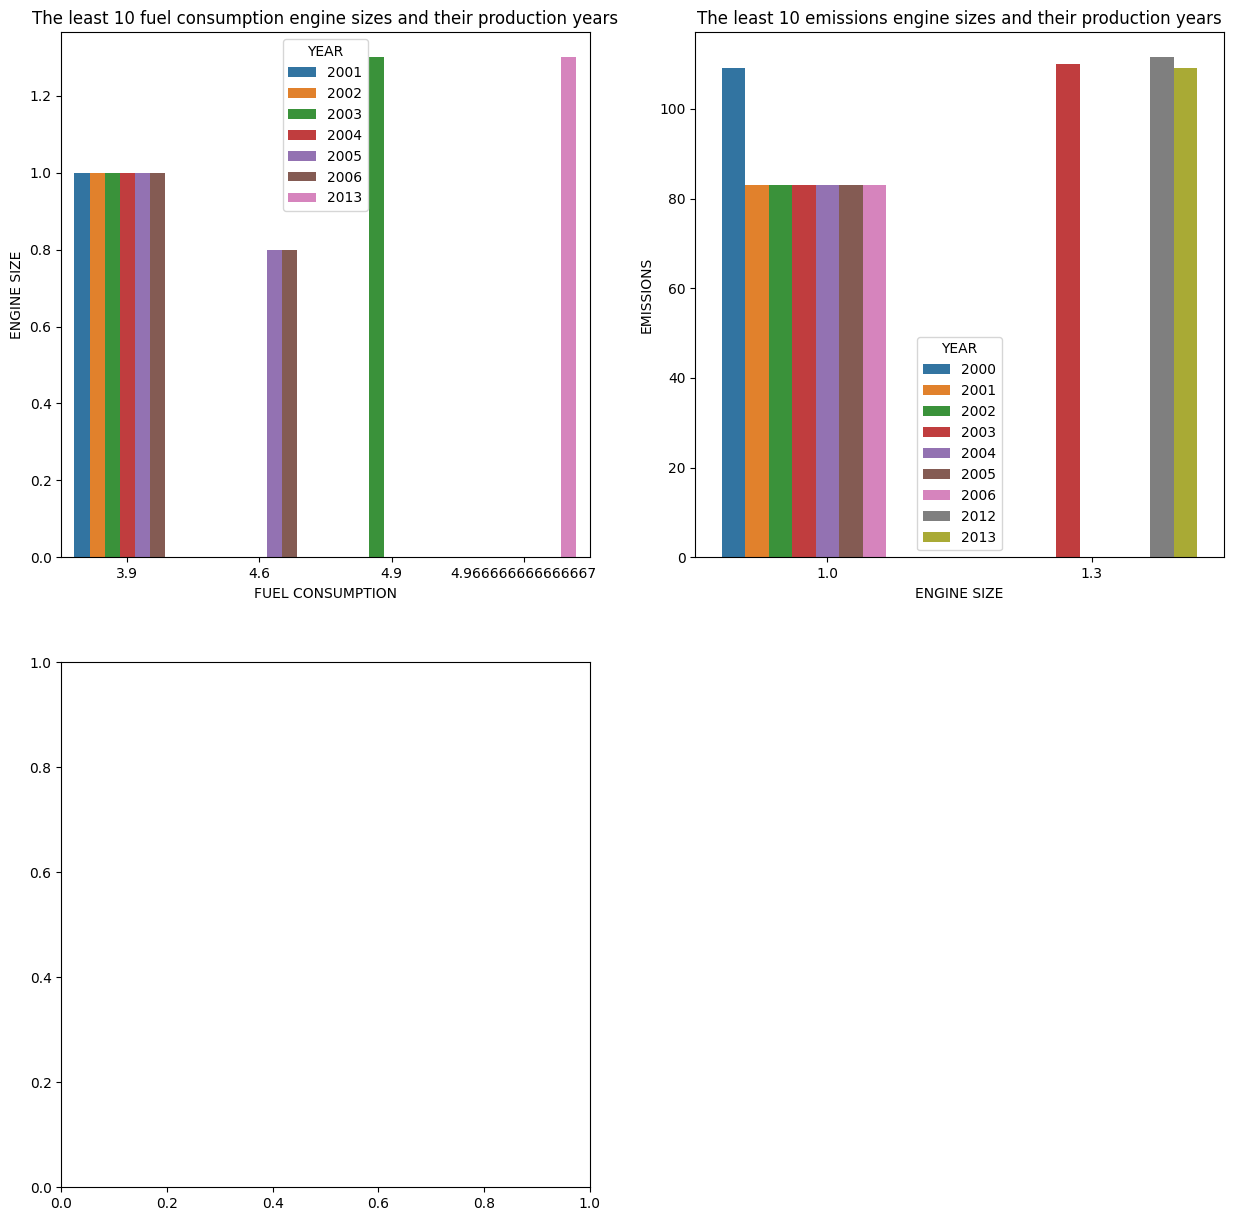

In [27]:
# Plot the relationships between different engine sizes/cylinder evolved with year and the change on fuel consumption and emission
fig = plt.figure(figsize=(15,15))

# Plot engine size evolved with years and it relations to fuel consumption and emission
ax1 = plt.subplot(2,2,1)
engine_fuel=engine_df.sort_values(by="FUEL CONSUMPTION", ascending=True)
sns.barplot(engine_fuel[:10], y="ENGINE SIZE", x="FUEL CONSUMPTION", hue="YEAR")
plt.title("The least 10 fuel consumption engine sizes and their production years")

ax2 = plt.subplot(2,2,2)
engine_emission = engine_df.sort_values(by="EMISSIONS", ascending=True)
sns.barplot(engine_emission[:10], x="ENGINE SIZE", y="EMISSIONS", hue="YEAR")
plt.title("The least 10 emissions engine sizes and their production years")

ax3 = plt.subplot(2,2,3)
cylinder_fuel = cylinder_df.sort_values(by="FUEL CONSUMPTION", ascending=True)
sns


In [10]:
# Explore fuel consumption and emissions in relation to models of the cars and if the fuel consumption changes with different years of the models

# Concate Model and Make into 1 column due to we need both information to appear at the same time
fuel_df["car_model"] = fuel_df["MAKE"] + "_" + fuel_df["MODEL"]

model_df = fuel_df.groupby(["car_model", "YEAR"]).agg({"FUEL CONSUMPTION": "mean", "EMISSIONS": "mean"}).reset_index()
model_df.head()

,car_model,YEAR,FUEL CONSUMPTION,EMISSIONS
0,ACURA_1.6EL,2000,8.85,180.5
1,ACURA_1.7EL,2001,7.85,162.0
2,ACURA_1.7EL,2002,7.90,163.5
3,ACURA_1.7EL,2003,8.00,163.5
4,ACURA_1.7EL,2004,7.85,161.0


KeyboardInterrupt: 

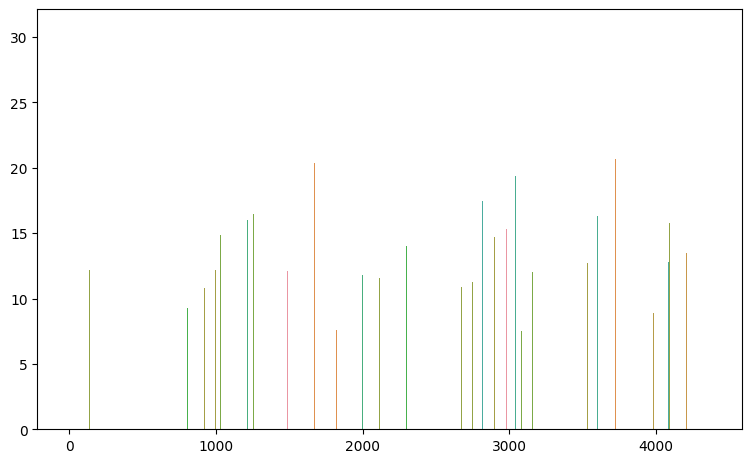

In [13]:
# Barplot the relationships
fig1 = plt.figure(figsize=(20,12))
# car_model vs. Fuel consumption
ax1 = plt.subplot(2,2,1)
sns.barplot(model_df, x="car_model", y="FUEL CONSUMPTION", hue="YEAR")
plt.title("How fuel consumption changed with the make of the year")

